<a href="https://colab.research.google.com/github/gtakhil95/Akhil_INFO5731_Fall2024/blob/main/Gundampalli_Akhil_Exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [6]:
import gensim
from gensim import corpora
from gensim.models import CoherenceModel, LsiModel
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import pandas as pd

nltk.download('stopwords')
nltk.download('wordnet')

documents = ["Cows are large animals raised for their milk and meat.",
"Sheep produce wool and are often kept in flocks.",
"Chickens are common farm birds that lay eggs and can be used for meat.",
"Goats are hardy animals that produce milk and can live in various environments.",
"Pigs are intelligent animals raised mainly for their meat."]

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
texts = [ [lemmatizer.lemmatize(word) for word in doc.lower().split() if word not in stop_words]
for doc in documents ]
texts = [text for text in texts if text]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

min_topics, max_topics = 2, 5
best_coherence = 0
best_num_topics = min_topics
best_model = None

# The for loop code block needs to be indented
for num_topics in range(min_topics, max_topics + 1):
    # Indented 4 spaces
    lsa_model = LsiModel(corpus, num_topics=num_topics, id2word=dictionary)
    coherence_model = CoherenceModel(model=lsa_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    if coherence_score > best_coherence:
        best_coherence = coherence_score
        best_num_topics = num_topics
        best_model = lsa_model

print(f'Best number of topics: {best_num_topics}')
print(f'Best coherence score: {best_coherence}')
print("\nLSA Topics:")
for idx, topic in best_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Best number of topics: 2
Best coherence score: 0.3981575219652713

LSA Topics:
Topic 0: 0.484*"animal" + 0.421*"meat." + 0.334*"milk" + 0.320*"raised" + 0.196*"produce" + 0.170*"large" + 0.170*"cow" + 0.164*"hardy" + 0.164*"various" + 0.164*"goat"
Topic 1: -0.321*"meat." + 0.285*"produce" + -0.273*"lay" + -0.273*"common" + -0.273*"farm" + -0.273*"bird" + -0.273*"used" + -0.273*"egg" + -0.273*"chicken" + 0.195*"hardy"


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [8]:
import gensim
from gensim import corpora, models
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Creating a simple text dataset on farm animals
documents = [
    "Cows are large animals raised for their milk and meat.",
    "Sheep produce wool and are often kept in flocks.",
    "Chickens are common farm birds that lay eggs and can be used for meat.",
    "Goats are hardy animals that produce milk and can live in various environments.",
    "Pigs are intelligent animals raised mainly for their meat."
]

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocess the text data
texts = [
    [lemmatizer.lemmatize(word) for word in doc.lower().split() if word not in stop_words and len(word) > 2]
    for doc in documents
]
texts = [text for text in texts if text]

# Create dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Define the range for the number of topics
min_topics = 2
max_topics = 5
coherence_scores = []
models_lsa = []

# Training LSA models and calculating coherence scores
for k in range(min_topics, max_topics + 1):
    lsa_model = models.LsiModel(corpus, num_topics=k, id2word=dictionary)
    models_lsa.append(lsa_model)
    coherence_model = CoherenceModel(model=lsa_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

# Determine the best number of topics
best_k = min_topics + coherence_scores.index(max(coherence_scores))
best_lsa_model = models_lsa[coherence_scores.index(max(coherence_scores))]

# Output the results
print(f"Optimal number of topics: {best_k}")
print(f"Highest Coherence Score: {max(coherence_scores)}")
print("\nBest LSA Model Topics:")

# Print topics from the best model
for idx, topic in best_lsa_model.print_topics(num_topics=best_k):
    print(f"Topic {idx}: {topic}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Optimal number of topics: 4
Highest Coherence Score: 0.39025008642613146

Best LSA Model Topics:
Topic 0: -0.484*"animal" + -0.421*"meat." + -0.334*"milk" + -0.320*"raised" + -0.196*"produce" + -0.170*"large" + -0.170*"cow" + -0.164*"goat" + -0.164*"hardy" + -0.164*"environments."
Topic 1: 0.321*"meat." + -0.285*"produce" + 0.273*"used" + 0.273*"common" + 0.273*"bird" + 0.273*"lay" + 0.273*"egg" + 0.273*"chicken" + 0.273*"farm" + -0.195*"goat"
Topic 2: -0.362*"produce" + 0.293*"raised" + -0.244*"often" + -0.244*"sheep" + -0.244*"flocks." + -0.244*"wool" + -0.244*"kept" + -0.193*"used" + -0.193*"chicken" + -0.193*"bird"
Topic 3: 0.317*"flocks." + 0.317*"often" + 0.317*"sheep" + 0.317*"kept" + 0.317*"wool" + 0.227*"raised" + -0.225*"goat" + -0.225*"live" + -0.225*"hardy" + -0.225*"environments."


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [14]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.5 MB/s eta 0:00:00


In [15]:
from bertopic import BERTopic
from umap import UMAP
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from hdbscan import HDBSCAN

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Sample dataset of farm animals
documents = [
    "Cows are large animals raised for their milk and meat.",
    "Sheep produce wool and are often kept in flocks.",
    "Chickens are common farm birds that lay eggs and can be used for meat.",
    "Goats are hardy animals that produce milk and can live in various environments.",
    "Pigs are intelligent animals raised mainly for their meat.",
    "Ducks are waterfowl that are raised for their eggs and meat.",
    "Turkeys are large birds often raised for Thanksgiving.",
    "Horses are used for riding, racing, and farm work.",
    "Donkeys are used as pack animals and for agricultural tasks.",
    "Llamas are used for their wool and as pack animals in South America."
]

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocess the text data
texts = [
    ' '.join([lemmatizer.lemmatize(word) for word in doc.lower().split() if word not in stop_words and len(word) > 2])
    for doc in documents
]
texts = [text for text in texts if text]

# Set up UMAP and HDBSCAN models for BERTopic
umap_model = UMAP(n_neighbors=2, min_dist=0.1)
hdbscan_model = HDBSCAN(min_samples=1)

# Initialize and fit BERTopic model
topic_model = BERTopic(umap_model=umap_model, hdbscan_model=hdbscan_model, verbose=True)
topics, probs = topic_model.fit_transform(texts)

# Display topic information
topic_info = topic_model.get_topic_info()
print(topic_info)

# Print the details of each topic
for i in range(len(topic_model.get_topics())):
    print(f"\nTopic {i}: {topic_model.get_topic(i)}")

# Also print out topic -1 and 0 if available
for topic_num in range(-1, 1):
    print(f"\nTopic {topic_num}: {topic_model.get_topic(topic_num)}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
2024-11-04 03:30:24,016 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-11-04 03:30:33,848 - BERTopic - Embedding - Completed ✓
2024-11-04 03:30:33,851 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-04 03:30:44,895 - BERTopic - Dimensionality - Completed ✓
2024-11-04 03:30:44,897 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-04 03:30:44,904 - BERTopic - Cluster - Completed ✓
2024-11-04 03:30:44,915 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-04 03:30:44,934 - BERTopic - Representation - Completed ✓


   Topic  Count                        Name  \
0     -1     10  -1_animal_used_raised_meat   

                                      Representation  \
0  [animal, used, raised, meat, egg, farm, often,...   

                                 Representative_Docs  
0  [llama used wool pack animal south america., c...  

Topic 0: False

Topic -1: [('animal', 0.2050522337627468), ('used', 0.1770758340035135), ('raised', 0.1770758340035135), ('meat', 0.1770758340035135), ('egg', 0.10926586129582751), ('farm', 0.10926586129582751), ('often', 0.10926586129582751), ('produce', 0.10926586129582751), ('wool', 0.10926586129582751), ('milk', 0.10926586129582751)]

Topic 0: False


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [9]:
import gensim
from gensim import corpora, models
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Sample dataset of farm animals
documents = [
    "The cow gives milk and is raised on farms.",
    "Chickens lay eggs and are a source of meat.",
    "Pigs are often kept for their meat and intelligence.",
    "Sheep provide wool and are kept for their meat.",
    "Horses are used for riding and farm work.",
    "Goats are hardy animals that can survive in tough environments.",
    "Ducks are raised for their eggs and as pets.",
    "Farmers grow crops and raise livestock.",
    "Farm dogs help herd sheep and protect the farm.",
    "Bees are important for pollination and honey production."
]

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocess the text data
texts = [
    [lemmatizer.lemmatize(word) for word in doc.lower().split() if word not in stop_words and len(word) > 2]
    for doc in documents
]
texts = [text for text in texts if text]

# Create dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Determine the optimal number of topics
min_topics = 2
max_topics = 10
coherence_scores = []
models_lsa = []

# Train LSA models and calculate coherence scores
for k in range(min_topics, max_topics + 1):
    lsa_model = models.LsiModel(corpus, num_topics=k, id2word=dictionary)
    models_lsa.append(lsa_model)
    coherence_model = CoherenceModel(model=lsa_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

# Determine the best number of topics
best_k = min_topics + coherence_scores.index(max(coherence_scores))
best_lsa_model = models_lsa[coherence_scores.index(max(coherence_scores))]

# Output the results
print(f"Optimal number of topics: {best_k}")
print(f"Highest Coherence Score: {max(coherence_scores)}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Optimal number of topics: 9
Highest Coherence Score: 0.4728579449722127


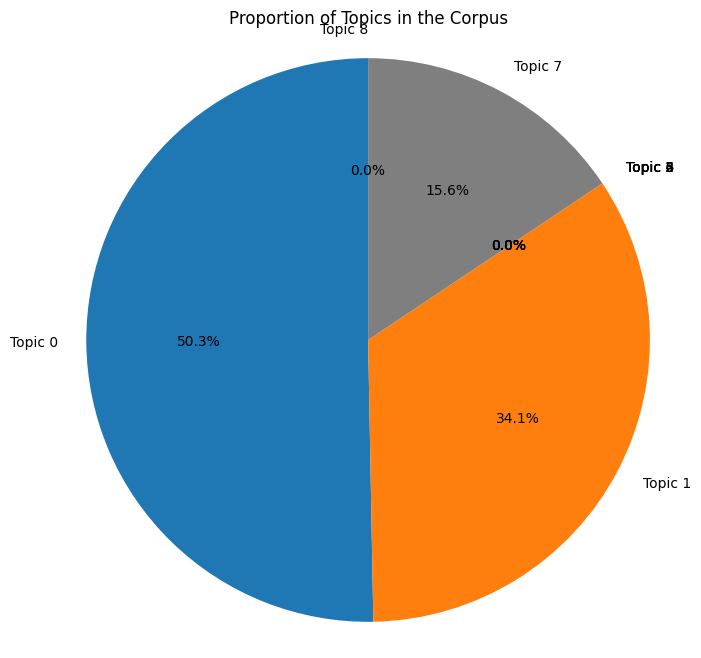

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def plot_topic_pie_chart(corpus, model, num_topics):
    # Initialize topic distribution array
    topic_distribution = np.zeros(num_topics)

    # Calculate the distribution of topics across the corpus
    for doc_bow in corpus:
        topic_vector = model[doc_bow]
        for topic, prob in topic_vector:
            topic_distribution[topic] += prob

    # Normalize the distribution to ensure non-negative values
    topic_distribution = np.maximum(topic_distribution, 0)
    total = topic_distribution.sum()

    if total > 0:
        topic_distribution /= total  # Convert to proportions

    # Plot the topic distribution as a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(topic_distribution, labels=[f'Topic {i}' for i in range(num_topics)], autopct='%1.1f%%', startangle=90)
    plt.title('Proportion of Topics in the Corpus')
    plt.axis('equal')
    plt.show()

# Plot the pie chart with the best LSA model and optimal number of topics
plot_topic_pie_chart(corpus, best_lsa_model, best_k)


This pie chart shows the proportional representation of each topic within the corpus. It’s created
by aggregating the probability of each topic across all documents, resulting in a distribution that
highlights which topics are most prevalent. Each slice of the pie represents a different topic, labeled
from “Topic 0” to “Topic N,” and its size reflects its relative presence in the corpus. The startangle=
90 parameter rotates the chart for a more visually appealing layout, and autopct=‘%1.1f%%’
shows the percentage of each topic.

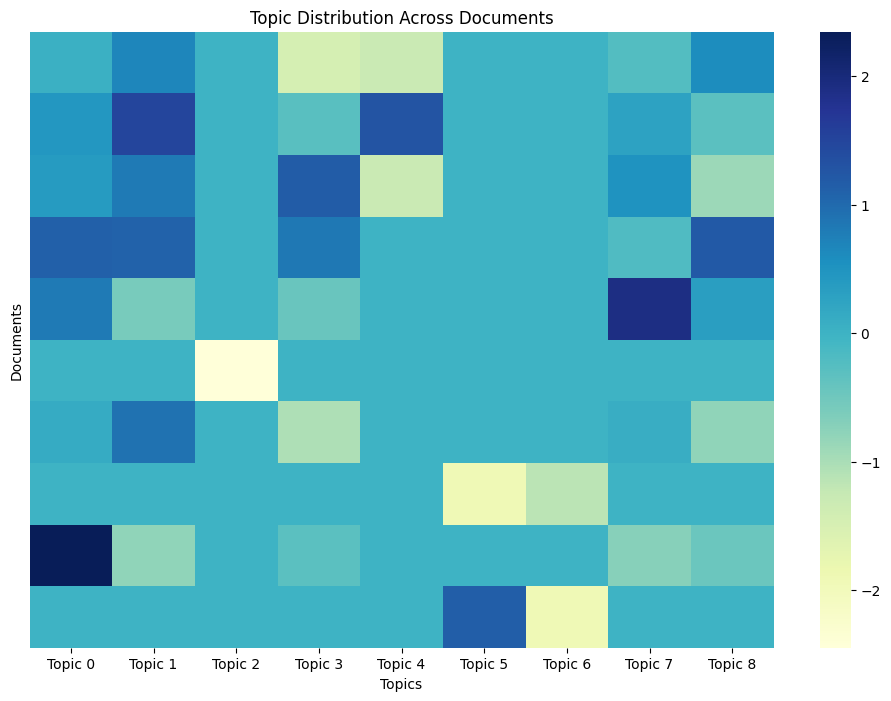

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_topic_heatmap(corpus, model, num_topics):
    # Initialize the topic distribution array
    topic_distribution = np.zeros((len(corpus), num_topics))

    # Populate the topic distribution matrix
    for i, doc_bow in enumerate(corpus):
        topic_vector = model[doc_bow]
        for topic, prob in topic_vector:
            topic_distribution[i, topic] = prob

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        topic_distribution,
        cmap='YlGnBu',
        cbar=True,
        xticklabels=[f'Topic {i}' for i in range(num_topics)],
        yticklabels=[]
    )
    plt.title('Topic Distribution Across Documents')
    plt.xlabel('Topics')
    plt.ylabel('Documents')
    plt.show()

# Call the function to plot the heatmap
plot_topic_heatmap(corpus, best_lsa_model, best_k)

This heatmap provides a visual overview of topic distributions across all documents. Each row
represents a document, and each column corresponds to a topic, with the color intensity indicating
the presence (or probability) of that topic in each document. The color gradient (using the YlGnBu
color map) represents how strongly each topic is associated with each document. Darker shades
signify higher probabilities, helping identify dominant topics within individual documents or clusters
of documents with similar topic compositions.

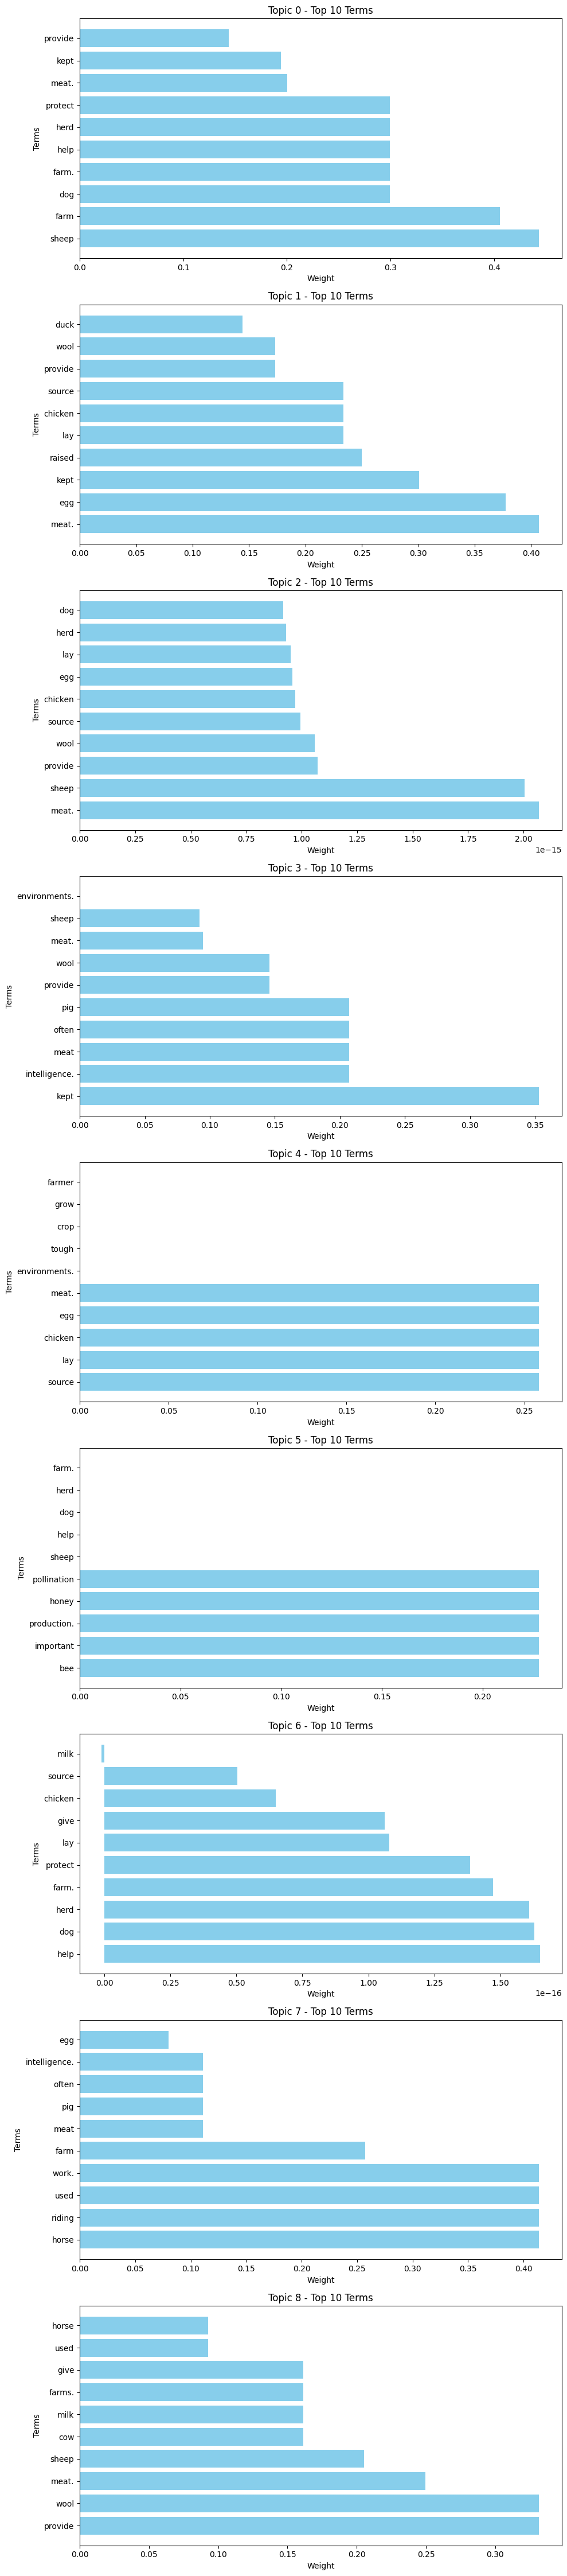

In [12]:
import matplotlib.pyplot as plt

def plot_topic_term_frequencies(model, dictionary, num_topics, num_terms=10):
    # Set the figure size to fit the number of topics
    plt.figure(figsize=(10, 5 * num_topics))

    for i in range(num_topics):
        plt.subplot(num_topics, 1, i + 1)

        # Get terms and their weights for each topic
        terms = model.get_topics()[i]
        terms_with_weights = sorted(
            zip(dictionary.values(), terms),
            key=lambda x: x[1],
            reverse=True
        )[:num_terms]

        terms = [term for term, weight in terms_with_weights]
        weights = [weight for term, weight in terms_with_weights]

        # Plot bar chart for terms and weights
        plt.barh(terms, weights, color='skyblue')
        plt.title(f'Topic {i} - Top {num_terms} Terms')
        plt.xlabel('Weight')
        plt.ylabel('Terms')

    plt.tight_layout()
    plt.show()

# Call the function with the best LSA model and optimal number of topics
plot_topic_term_frequencies(best_lsa_model, dictionary, best_k)

These bar charts displays the top terms associated with each topic and their relative weights,
representing how significant each term is to the topic. For each topic, a horizontal bar chart is
created where each bar corresponds to a term, and the bar length represents its weight or relevance
within the topic. The charts provides insight into the defining terms of each topic, aiding in
interpreting what each topic represents based on its highest-weighted terms. The top num_terms
terms are shown per topic, allowing for a clear and concise representation.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

Here is my evaluation of the topic modeling algorithms:

LDA: I found LDA suitable for general use due to its interpretability and probabilistic foundation.
It models documents as mixtures of topics, which helps identify key themes. However, it may
struggle with short texts where topic distinctions aren’t very clear.

NMF: In my view, NMF often produces more coherent topics, particularly with shorter documents.
It decomposes the term-document matrix into non-negative factors, making it effective for finding
distinct topics, though it lacks LDAs probabilistic grounding.

BERTopic: I recommend BERTopic for datasets with complex or nuanced language. Its use of
BERT embeddings captures semantic relationships well, resulting in coherent topics. However, it is
computationally demanding, so it’s best suited for smaller datasets or when computational resources
are sufficient.

LSA: LSA is quicker and simpler but tends to produce less interpretable topics. It relies on SVD to
identify latent topics, making it a good starting point, but not my first choice for detailed analysis.
On my view If the dataset involves nuanced or complex language, I’d suggest BERTopic due to
its ability to capture semantic similarity using embeddings. For more general applications, LDA
or NMF can be suitable choices, depending on whether the dataset consists of shorter or longer
documents.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



My understanding of how models like as LSA and BERTopic organize and interpret textual information has improved as a result of this experiment, which gave me useful insights into topic modeling and feature extraction from text data. The exercise showed the advantages and disadvantages of each model in capturing complex subjects by applying matrix decomposition and clustering techniques. Setting up parameters like topic numbers and UMAP/HDBSCAN settings, which required repeated experimentation, and understanding setup needs, including lemmatization and stop word removal to reduce noise, were challenges. It was also important to make sure that preprocessing was the same for all models. This activity is extremely relevant to natural language processing (NLP), as topic modeling facilitates information retrieval, document structuring, and unsupervised learning. It helps prepare unstructured material for additional analysis and is closely related to feature extraction.

